In [1]:

# import required packages

import glob
import time
import pandas as pd

from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import keras

In [3]:
import nltk
import pandas as pd
import os

In [4]:
# preprocess sql data to have same format for all files

def clean_sqli_data(data):

    for i in range(len(data)):

        data[i]=data[i].replace('\n', '')
        data[i]=data[i].replace('%20', ' ')
        data[i]=data[i].replace('=', ' = ')
        data[i]=data[i].replace('((', ' (( ')
        data[i]=data[i].replace('))', ' )) ')
        data[i]=data[i].replace('(', ' ( ')
        data[i]=data[i].replace(')', ' ) ')

    return data

In [5]:
path='/content/drive/MyDrive/Sqli/sqli.txt'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# read data from file

sql_lines_fuzzing=[]
f = open(path, "r")
for x in f:
    sql_lines_fuzzing.append(x)

In [8]:
sql_lines_fuzzing=clean_sqli_data(sql_lines_fuzzing)

In [9]:
sql_lines_fuzzing[:15]

["'sqlvuln",
 "'+sqlvuln",
 'sqlvuln;',
 ' ( sqlvuln ) ',
 "a' or 1 = 1--",
 '"a"" or 1 = 1--"',
 ' or a  =  a',
 "a' or 'a'  =  'a",
 '1 or 1 = 1',
 "a' waitfor delay '0:0:10'--",
 "1 waitfor delay '0:0:10'--",
 'declare @q nvarchar  ( 4000 )  select @q  = ',
 '0x770061006900740066006F0072002000640065006C00610079002000270030003A0030003A',
 '0',
 '031003000270000']

In [10]:
path='/content/drive/MyDrive/Sqli/camoufl4g3.txt'

In [11]:
# read data from file

sql_lines_camoufl4g3=[]
f = open(path, "r")
for x in f:
    sql_lines_camoufl4g3.append(x)

In [12]:
sql_lines_camoufl4g3[:15] # data before cleaning

["'-'\n",
 "' '\n",
 "'&'\n",
 "'^'\n",
 "'*'\n",
 "' or ''-'\n",
 "' or '' '\n",
 "' or ''&'\n",
 "' or ''^'\n",
 "' or ''*'\n",
 '"-"\n',
 '" "\n',
 '"&"\n',
 '"^"\n',
 '"*"\n']

In [13]:
sql_lines_camoufl4g3=clean_sqli_data(sql_lines_camoufl4g3)

In [14]:
sql_lines_camoufl4g3[:15]  # data after cleaning

["'-'",
 "' '",
 "'&'",
 "'^'",
 "'*'",
 "' or ''-'",
 "' or '' '",
 "' or ''&'",
 "' or ''^'",
 "' or ''*'",
 '"-"',
 '" "',
 '"&"',
 '"^"',
 '"*"']

In [15]:
path='/content/drive/MyDrive/Sqli/libinjection-bypasses.txt'

In [16]:
# read data from file

sql_lines_bypasses=[]
f = open(path, "r")
for x in f:
    sql_lines_bypasses.append(x)

In [17]:
sql_lines_bypasses[:5] # before cleaning

['&()o1: select * from users where id=1 or (\\)=1 union select 1,@@VERSION -- 1\n',
 '&(.)o: select * from users where id=1 or (\\.)=1 union select 1,@@VERSION -- 1\n',
 '&(1&1: select * from users where id=1 or (\\+)=1 or 1=1 -- 1\n',
 '&(1)o: select * from users where id=1 or (1)=1 union select 1,banner from v$version where rownum=1 -- 1\n',
 '&(1UE: select * from users where id=1 or (\\+)=1 union select 1,@@VERSION -- 1\n']

In [18]:
print(len(sql_lines_bypasses))

474


In [19]:
sql_lines_bypasses=clean_sqli_data(sql_lines_bypasses)

In [20]:
sql_lines_bypasses[:5]  # data after cleaning

['& (  ) o1: select * from users where id = 1 or  ( \\ )  = 1 union select 1,@@VERSION -- 1',
 '& ( . ) o: select * from users where id = 1 or  ( \\. )  = 1 union select 1,@@VERSION -- 1',
 '& ( 1&1: select * from users where id = 1 or  ( \\+ )  = 1 or 1 = 1 -- 1',
 '& ( 1 ) o: select * from users where id = 1 or  ( 1 )  = 1 union select 1,banner from v$version where rownum = 1 -- 1',
 '& ( 1UE: select * from users where id = 1 or  ( \\+ )  = 1 union select 1,@@VERSION -- 1']

In [21]:
# if don't want &(*)* sign in beginning of each sentence then run next code else don't

for i in range(len(sql_lines_bypasses)):
    sentence=sql_lines_bypasses[i]
    sql_lines_bypasses[i]=sentence.split(':')[1]


In [22]:
sql_lines_bypasses[:5]

[' select * from users where id = 1 or  ( \\ )  = 1 union select 1,@@VERSION -- 1',
 ' select * from users where id = 1 or  ( \\. )  = 1 union select 1,@@VERSION -- 1',
 ' select * from users where id = 1 or  ( \\+ )  = 1 or 1 = 1 -- 1',
 ' select * from users where id = 1 or  ( 1 )  = 1 union select 1,banner from v$version where rownum = 1 -- 1',
 ' select * from users where id = 1 or  ( \\+ )  = 1 union select 1,@@VERSION -- 1']

In [23]:
path='/content/drive/MyDrive/Sqli/sqli.txt'

In [24]:
# read data from file

sql_lines_owasp=[]
f = open(path, "r")
for x in f:
    sql_lines_owasp.append(x)

In [25]:
sql_lines_owasp[0:15] # before cleaning

["'sqlvuln\n",
 "'+sqlvuln\n",
 'sqlvuln;\n',
 '(sqlvuln)\n',
 "a' or 1=1--\n",
 '"a"" or 1=1--"\n',
 ' or a = a\n',
 "a' or 'a' = 'a\n",
 '1 or 1=1\n',
 "a' waitfor delay '0:0:10'--\n",
 "1 waitfor delay '0:0:10'--\n",
 'declare @q nvarchar (4000) select @q =\n',
 '0x770061006900740066006F0072002000640065006C00610079002000270030003A0030003A\n',
 '0\n',
 '031003000270000\n']

In [26]:
print(len(sql_lines_owasp))

142


In [27]:
sql_lines_owasp=clean_sqli_data(sql_lines_owasp)

In [28]:
sql_lines_owasp[:15] # after cleaning

["'sqlvuln",
 "'+sqlvuln",
 'sqlvuln;',
 ' ( sqlvuln ) ',
 "a' or 1 = 1--",
 '"a"" or 1 = 1--"',
 ' or a  =  a',
 "a' or 'a'  =  'a",
 '1 or 1 = 1',
 "a' waitfor delay '0:0:10'--",
 "1 waitfor delay '0:0:10'--",
 'declare @q nvarchar  ( 4000 )  select @q  = ',
 '0x770061006900740066006F0072002000640065006C00610079002000270030003A0030003A',
 '0',
 '031003000270000']

In [29]:
path='/content/drive/MyDrive/Sqli/Generic-SQLi.txt'

In [30]:
# read data from file

sql_lines_Generic=[]
f = open(path, "r")
for x in f:
    sql_lines_Generic.append(x)

In [31]:
sql_lines_Generic[:15] # before cleaning

[")%20or%20('x'='x\n",
 '%20or%201=1\n',
 "; execute immediate 'sel' || 'ect us' || 'er'\n",
 'benchmark(10000000,MD5(1))#\n',
 'update\n',
 '";waitfor delay \'0:0:__TIME__\'--\n',
 '1) or pg_sleep(__TIME__)--\n',
 '||(elt(-3+5,bin(15),ord(10),hex(char(45))))\n',
 '"hi"") or (""a""=""a"\n',
 'delete\n',
 'like\n',
 '" or sleep(__TIME__)#\n',
 'pg_sleep(__TIME__)--\n',
 '*(|(objectclass=*))\n',
 'declare @q nvarchar (200) 0x730065006c00650063 ...\n']

In [32]:
print(len(sql_lines_Generic))

267


In [33]:
sql_lines_Generic=clean_sqli_data(sql_lines_Generic)

In [34]:
sql_lines_Generic[:15] # after cleaning

[" )  or  ( 'x' = 'x",
 ' or 1 = 1',
 "; execute immediate 'sel' || 'ect us' || 'er'",
 'benchmark ( 10000000,MD5 ( 1  )  )  #',
 'update',
 '";waitfor delay \'0:0:__TIME__\'--',
 '1 )  or pg_sleep ( __TIME__ ) --',
 '|| ( elt ( -3+5,bin ( 15 ) ,ord ( 10 ) ,hex ( char ( 45  )  )    )  )  ',
 '"hi"" )  or  ( ""a"" = ""a"',
 'delete',
 'like',
 '" or sleep ( __TIME__ ) #',
 'pg_sleep ( __TIME__ ) --',
 '* ( | ( objectclass = *  )  )  ',
 'declare @q nvarchar  ( 200 )  0x730065006c00650063 ...']

In [35]:

# function to remove stopwords

stop_words = set(stopwords.words('english'))

def fun_remove_stop_words(posts):

    filtered=''

    for x in posts.split(' '):
        if x not in stop_words:
            filtered+=' '+x

    return filtered

In [36]:
path='/content/drive/MyDrive/Sqli/'
file="plain.txt"

In [37]:
#read benign data

df = pd.read_csv(os.path.join(path,file), sep='Aw3s0meSc0t7', names=['benign'], header=None, engine='python')

In [38]:
df.head()

,benign
0,Add plain text here
1,“Ne te quaesiveris extra.”
2,“Man is his own star; and the soul that can
3,"Render an honest and a perfect man,"
4,"Commands all light, all influence, all fate;"


In [39]:
plain_text=df['benign'].values  # get sentences

In [40]:
plain_text[:5]

array(['Add plain text here', '“Ne te quaesiveris extra.”',
       '“Man is his own star; and the soul that can',
       'Render an honest and a perfect man,',
       'Commands all light, all influence, all fate;'], dtype=object)

In [41]:
plain_text=plain_text[:-22] # removed last 22 records that were urls

In [42]:
len(plain_text)

3672

In [43]:
# convert from list to string

data=''
for x in plain_text:
    data+=" " + x

In [44]:
type(data)

str

In [45]:
data=fun_remove_stop_words(data)  # remove stop words
data=data.split('.')              # split sentences

In [46]:
# seperate words inside tags

for i in range(len(data)):
    data[i]=data[i].replace('<', ' <')
    data[i]=data[i].replace('>', '> ')
    data[i]=data[i].replace('=', ' = ')

In [47]:
data[:5]

['  Add plain text “Ne te quaesiveris extra',
 '” “Man star; soul Render honest perfect man, Commands light, influence, fate; Nothing falls early late',
 ' Our acts angels are, good ill, Our fatal shadows walk us still',
 '” Epilogue Beaumont Fletcher’s Honest Man’s Fortune Cast bantling rocks, Suckle she-wolf’s teat; Wintered hawk fox, Power speed hands feet',
 ' I read day verses written eminent painter original conventional']

Statistics

In [48]:
print("Benign records: %2i" %len(data))

Benign records: 3072


In [49]:
# read self created benign data

path='/content/drive/MyDrive/Sqli/benign_for_training.txt'
benign_data=[]
f = open(path, "r")
for x in f:
    benign_data.append(x)


In [50]:
# read self created sqli data

path='/content/drive/MyDrive/Sqli/sqli_for_training.txt'
sqli_data=[]
f = open(path, "r")
for x in f:
    sqli_data.append(x)


In [51]:
len(benign_data)

440

In [52]:
benign_sentence=[]
for i in benign_data:
    sentences=i.split('.')

    for sentence in sentences:
        benign_sentence.append(sentence)

In [53]:
len(benign_sentence)

1115

In [54]:
print("total benign data : " ,len(benign_sentence)+len(data))

total benign data :  4187


In [55]:
len(sqli_data)

290

In [56]:
1128+290

1418

In [57]:
print(f"SQL fuzzing : {len(sql_lines_fuzzing)}  camoufl4gs : {len(sql_lines_camoufl4g3)} parsed : {len(sql_lines_bypasses)} owasp : {len(sql_lines_owasp)} generic : {len(sql_lines_Generic)} \n total sql injection data : {len(sql_lines_Generic)+len(sql_lines_owasp)+len(sql_lines_bypasses)+len(sql_lines_camoufl4g3)+len(sql_lines_fuzzing)} ")

SQL fuzzing : 142  camoufl4gs : 77 parsed : 474 owasp : 142 generic : 267 
 total sql injection data : 1102 


#### combination of all sqli attacks

In [58]:
all_sqli_sentence=sql_lines_owasp+sql_lines_bypasses+sql_lines_camoufl4g3+sql_lines_fuzzing+sql_lines_Generic

In [59]:
len(all_sqli_sentence)

1102

In [60]:
# replace numeric values by a keyword 'numeric'
def optional_numeric_to_numeric(all_sqli_sentence):

    for i in range(len(all_sqli_sentence)):


        all_sqli_sentence[i]=all_sqli_sentence[i].replace('1 ', 'numeric')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace(' 1', 'numeric')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace("'1 ", "'numeric ")
        all_sqli_sentence[i]=all_sqli_sentence[i].replace(" 1'", " numeric'")
        all_sqli_sentence[i]=all_sqli_sentence[i].replace('1,', 'numeric,')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace("1\ ", 'numeric')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace("‘1", '‘numeric')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace(" 2 ", " numeric ")
        all_sqli_sentence[i]=all_sqli_sentence[i].replace(' 3 ', ' numeric ')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace(' 3--', ' numeric--')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace(" 4 ", ' numeric ')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace(" 5 ", ' numeric ')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace(' 6 ', ' numeric ')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace(" 7 ", ' numeric ')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace(" 8 ", ' numeric ')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace('1234', ' numeric ')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace("22", ' numeric ')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace(" 8 ", ' numeric ')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace(" 200 ", ' numeric ')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace("23 ", ' numeric ')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace('"1', '"numeric')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace('1"', '"numeric')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace("7659", 'numeric')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace(" 37 ", ' numeric ')
        all_sqli_sentence[i]=all_sqli_sentence[i].replace(" 45 ", ' numeric ')

    return all_sqli_sentence


In [61]:
all_sqli_sentence

["'sqlvuln",
 "'+sqlvuln",
 'sqlvuln;',
 ' ( sqlvuln ) ',
 "a' or 1 = 1--",
 '"a"" or 1 = 1--"',
 ' or a  =  a',
 "a' or 'a'  =  'a",
 '1 or 1 = 1',
 "a' waitfor delay '0:0:10'--",
 "1 waitfor delay '0:0:10'--",
 'declare @q nvarchar  ( 4000 )  select @q  = ',
 '0x770061006900740066006F0072002000640065006C00610079002000270030003A0030003A',
 '0',
 '031003000270000',
 'declare @s varchar ( 22 )  select @s  = ',
 '0x77616974666F722064656C61792027303A303A31302700 exec ( @s ) ',
 '0x730065006c00650063007400200040004000760065007200730069006f006e00 exec ( @q ) ',
 'declare @s varchar  ( 8000 )  select @s  =  0x73656c65637420404076657273696f6e',
 'exec ( @s ) ',
 "a'",
 '?',
 "' or 1 = 1",
 '‘ or 1 = 1 --',
 "x' AND userid IS NULL; --",
 "x' AND email IS NULL; --",
 "anything' OR 'x' = 'x",
 "x' AND 1 =  ( SELECT COUNT ( * )  FROM tabname ) ; --",
 "x' AND members.email IS NULL; --",
 "x' OR full_name LIKE '%Bob%",
 '23 OR 1 = 1',
 "'; exec master..xp_cmdshell 'ping 172.10.1.255'--",
 "'",
 "'

#### Combination of benign an attack data

In [62]:
import pandas as pd

In [63]:
# give labels to sql data

values=[]
for i in all_sqli_sentence:
    values.append((i,1))

In [64]:
# give labels to benign data

for i in data:
    values.append((i,0))

In [65]:
len(all_sqli_sentence)+len(data)

4174

In [66]:
len(values)

4174

In [67]:
for i in benign_sentence:
    values.append((i,0))

In [68]:
len(values)

5289

In [69]:
for i in sqli_data:
    values.append((i,1))

In [70]:
len(values)

5579

In [71]:
values[1]

("'+sqlvuln", 1)

In [72]:
# convert to dataframe

df=pd.DataFrame(values,columns=['Sentence','Label'])



In [73]:
df.head()

,Sentence,Label
0,'sqlvuln,1
1,'+sqlvuln,1
2,sqlvuln;,1
3,( sqlvuln ),1
4,a' or 1 = 1--,1


### Save data as csv

In [74]:
df.to_csv('sqli.csv', index=False, encoding='utf-16')

In [75]:
df=pd.read_csv('sqli.csv',encoding='utf-16')

In [76]:


from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer( min_df=2, max_df=0.7, max_features=4096, stop_words=stopwords.words('english'))
posts = vectorizer.fit_transform(df['Sentence'].values.astype('U')).toarray()



In [77]:
posts.shape

(5579, 4096)

In [78]:
posts.shape=(5579,64,64,1)

In [79]:
posts.shape

(5579, 64, 64, 1)

In [80]:
X=posts

In [81]:
y=df['Label']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
# split train test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
trainX=X_train.copy()
trainX.shape=(X_train.shape[0],trainX.shape[1]*trainX.shape[2])
testX=X_test.copy()
testX.shape=(testX.shape[0],testX.shape[1]*testX.shape[2])


#### CNN

In [85]:
pip install keras==2.12.0

In [86]:
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier

In [87]:
model=tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(64,64,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [88]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 256)        0

In [89]:
 import tensorflow as tf

# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('acc')>0.98):
#             print( "Reached 99.8% accuracy so cancelling training!")
#             self.model.stop_training=True
# callbacks = myCallback()

In [90]:
classifier_nn = model.fit(X_train,y_train,
                    epochs=30,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=128)


Epoch 1/30
35/35 [==============================] - 15s 112ms/step - loss: 0.3101 - accuracy: 0.8340 - val_loss: 0.2337 - val_accuracy: 0.8907
Epoch 2/30
35/35 [==============================] - 2s 43ms/step - loss: 0.1796 - accuracy: 0.9072 - val_loss: 0.1910 - val_accuracy: 0.9158
Epoch 3/30
35/35 [==============================] - 1s 39ms/step - loss: 0.1481 - accuracy: 0.9272 - val_loss: 0.1578 - val_accuracy: 0.9337
Epoch 4/30
35/35 [==============================] - 1s 39ms/step - loss: 0.1278 - accuracy: 0.9379 - val_loss: 0.1376 - val_accuracy: 0.9400
Epoch 5/30
35/35 [==============================] - 1s 40ms/step - loss: 0.1112 - accuracy: 0.9438 - val_loss: 0.1351 - val_accuracy: 0.9373
Epoch 6/30
35/35 [==============================] - 1s 39ms/step - loss: 0.0949 - accuracy: 0.9503 - val_loss: 0.1560 - val_accuracy: 0.9355
Epoch 7/30
35/35 [==============================] - 2s 55ms/step - loss: 0.0892 - accuracy: 0.9534 - val_loss: 0.1349 - val_accuracy: 0.9427
Epoch 8/30


In [91]:
pred=model.predict(X_test)

35/35 [==============================] - 1s 11ms/step


In [92]:
for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
    elif pred[i]<=0.5:
        pred[i]=0

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
accuracy_score(y_test,pred)

0.9516129032258065

In [95]:
for i,j in zip(y_test,pred):
    print(i==j)

[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]


#### Saving Model

In [96]:
from keras.models import load_model
import pickle

model.save('my_model_cnn.h5')
with open('vectorizer_cnn', 'wb') as fin:
    pickle.dump(vectorizer, fin)


In [97]:
def accuracy_function(tp,tn,fp,fn):

    accuracy = (tp+tn) / (tp+tn+fp+fn)

    return accuracy

In [98]:
def precision_function(tp,fp):

    precision = tp / (tp+fp)

    return precision

In [99]:
def recall_function(tp,fn):

    recall=tp / (tp+fn)

    return recall

In [100]:
def confusion_matrix(truth,predicted):

    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0

    for true,pred in zip(truth,predicted):

        if true == 1:
            if pred == true:
                true_positive += 1
            elif pred != true:
                false_negative += 1

        elif true == 0:
            if pred == true:
                true_negative += 1
            elif pred != true:
                false_positive += 1

    accuracy=accuracy_function(true_positive, true_negative, false_positive, false_negative)
    precision=precision_function(true_positive, false_positive)
    recall=recall_function(true_positive, false_negative)

    return (accuracy,
            precision,
           recall)

In [101]:
accuracy,precision,recall=confusion_matrix(y_test,pred)

In [102]:
print(" For CNN \n Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

 For CNN 
 Accuracy : 0.9516129032258065 
 Precision : 0.8632218844984803 
 Recall : 0.9692832764505119


In [103]:

import keras
from keras.models import load_model
import pickle


mymodel = tf.keras.models.load_model('my_model_cnn.h5')
myvectorizer = pickle.load(open("vectorizer_cnn", 'rb'))




def clean_data(input_val):

    input_val=input_val.replace('\n', '')
    input_val=input_val.replace('%20', ' ')
    input_val=input_val.replace('=', ' = ')
    input_val=input_val.replace('((', ' (( ')
    input_val=input_val.replace('))', ' )) ')
    input_val=input_val.replace('(', ' ( ')
    input_val=input_val.replace(')', ' ) ')
    input_val=input_val.replace('1 ', 'numeric')
    input_val=input_val.replace(' 1', 'numeric')
    input_val=input_val.replace("'1 ", "'numeric ")
    input_val=input_val.replace(" 1'", " numeric'")
    input_val=input_val.replace('1,', 'numeric,')
    input_val=input_val.replace(" 2 ", " numeric ")
    input_val=input_val.replace(' 3 ', ' numeric ')
    input_val=input_val.replace(' 3--', ' numeric--')
    input_val=input_val.replace(" 4 ", ' numeric ')
    input_val=input_val.replace(" 5 ", ' numeric ')
    input_val=input_val.replace(' 6 ', ' numeric ')
    input_val=input_val.replace(" 7 ", ' numeric ')
    input_val=input_val.replace(" 8 ", ' numeric ')
    input_val=input_val.replace('1234', ' numeric ')
    input_val=input_val.replace("22", ' numeric ')
    input_val=input_val.replace(" 8 ", ' numeric ')
    input_val=input_val.replace(" 200 ", ' numeric ')
    input_val=input_val.replace("23 ", ' numeric ')
    input_val=input_val.replace('"1', '"numeric')
    input_val=input_val.replace('1"', '"numeric')
    input_val=input_val.replace("7659", 'numeric')
    input_val=input_val.replace(" 37 ", ' numeric ')
    input_val=input_val.replace(" 45 ", ' numeric ')

    return input_val








def predict_sqli_attack():

    repeat=True

    beautify=''
    for i in range(20):
        beautify+= "="

    print(beautify)
    input_val=input("Give me some data to work on : ")
    print(beautify)


    if input_val== '0':
        repeat=False



    input_val=clean_data(input_val)
    input_val=[input_val]



    input_val=myvectorizer.transform(input_val).toarray()

    input_val.shape=(1,64,64,1)

    result=mymodel.predict(input_val)


    print(beautify)


    if repeat == True:

        if result>0.5:
            print("ALERT :::: This can be SQL injection")


        elif result<=0.5:
            print("It seems to be safe")

        print(beautify)

        predict_sqli_attack()

    elif repeat == False:
        print( " Good Bye ")





In [104]:
predict_sqli_attack()

Give me some data to work on : 0 or 0
1/1 [==============================] - 0s 291ms/step
ALERT :::: This can be SQL injection
Give me some data to work on : 0 or 0
1/1 [==============================] - 0s 18ms/step
ALERT :::: This can be SQL injection
Give me some data to work on : exit
1/1 [==============================] - 0s 18ms/step
ALERT :::: This can be SQL injection
Give me some data to work on : 0
1/1 [==============================] - 0s 18ms/step
 Good Bye 


In [105]:





predict_sqli_attack()

Give me some data to work on : 0
1/1 [==============================] - 0s 27ms/step
 Good Bye 


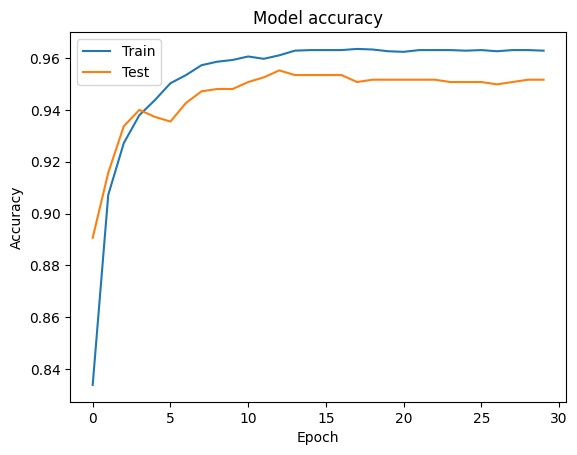

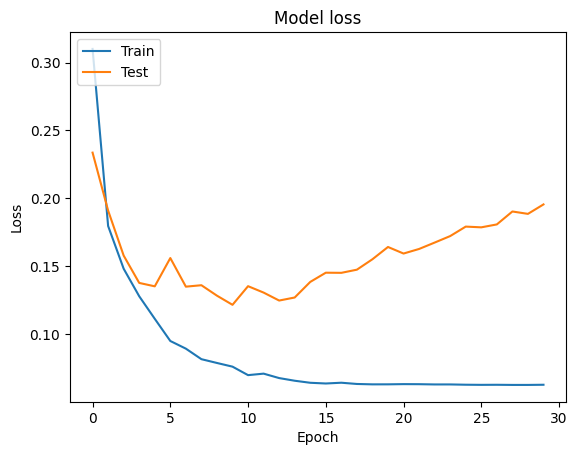

In [106]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(classifier_nn.history['accuracy'])
plt.plot(classifier_nn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(classifier_nn.history['loss'])
plt.plot(classifier_nn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [107]:

from sklearn.metrics import precision_score, recall_score, f1_score



y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



35/35 [==============================] - 0s 5ms/step
Precision: 0.8632218844984803
Recall: 0.9692832764505119
F1-score: 0.9131832797427653


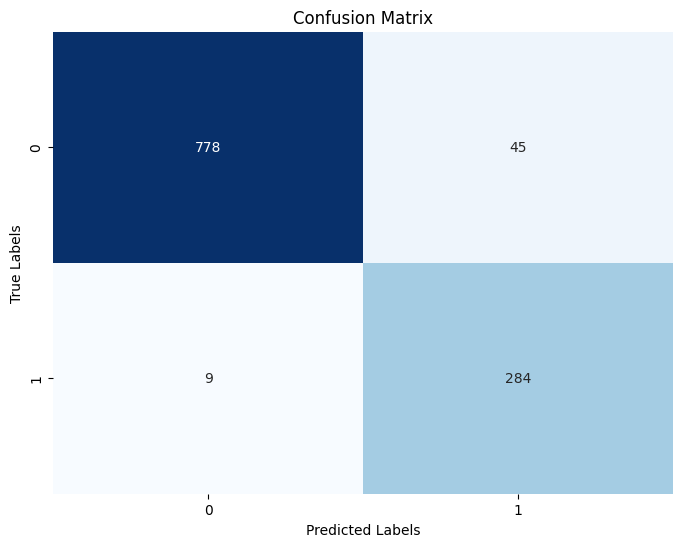

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

